In [2]:
import numpy as np
import re
import nltk
import pandas as pd
from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

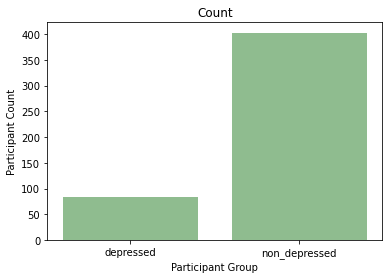

In [10]:
depressed = 83
non_depressed = 403
user_group = ['depressed','non_depressed']
user_count = [83,403]
plt.bar(user_group, user_count, color ='darkseagreen')
plt.xlabel("Participant Group")
plt.ylabel("Participant Count")
plt.title("Count")
plt.show()

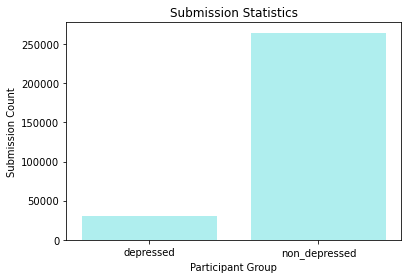

In [12]:
user_group = ['depressed','non_depressed']
user_count = [30851,264170]
plt.bar(user_group, user_count, color ='paleturquoise')
plt.xlabel("Participant Group")
plt.ylabel("Submission Count")
plt.title("Submission Statistics")
plt.show()

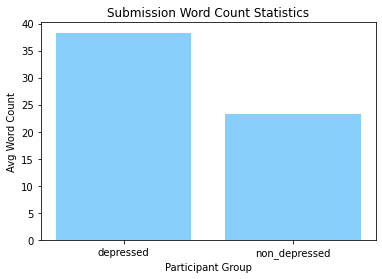

In [13]:
user_group = ['depressed','non_depressed']
user_count = [38.305,23.262]
plt.bar(user_group, user_count, color ='lightskyblue')
plt.xlabel("Participant Group")
plt.ylabel("Avg Word Count")
plt.title("Submission Word Count Statistics")
plt.show()

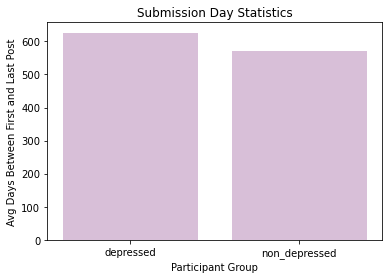

In [15]:
user_group = ['depressed','non_depressed']
user_count = [626,572]
plt.bar(user_group, user_count, color ='thistle')
plt.xlabel("Participant Group")
plt.ylabel("Avg Days Between First and Last Post")
plt.title("Submission Day Statistics")
plt.show()

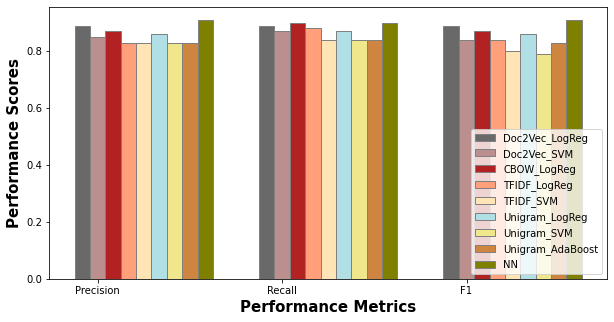

In [5]:
import numpy as np
barWidth = 0.25
fig = plt.subplots(figsize =(10, 5))
 
# set height of bar
Doc2Vec_LogReg = [0.89, 0.89, 0.89]
Doc2Vec_SVM = [0.85, 0.87, 0.84]
CBOW_LogReg = [0.87, 0.90, 0.87]
TFIDF_SVM = [0.83, 0.84, 0.80]
TFIDF_LogReg = [0.83, 0.88, 0.84]
Unigram_LogReg = [0.86, 0.87, 0.86]
Unigram_SVM = [0.83, 0.84, 0.79]
Unigram_AdaBoost = [0.83, 0.84, 0.83]
NN = [0.91, 0.90, 0.91]
 
# Set position of bar on X axis
br1 = np.arange(0, 3*len(Doc2Vec_LogReg), 3)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6= [x + barWidth for x in br5]
br7= [x + barWidth for x in br6]
br8= [x + barWidth for x in br7]
br9= [x + barWidth for x in br8]
# Make the plot
plt.bar(br1, Doc2Vec_LogReg, color ='dimgrey', width = barWidth,
        edgecolor ='grey', label ='Doc2Vec_LogReg')
plt.bar(br2, Doc2Vec_SVM, color ='rosybrown', width = barWidth,
        edgecolor ='grey', label ='Doc2Vec_SVM')
plt.bar(br3, CBOW_LogReg, color ='firebrick', width = barWidth,
        edgecolor ='grey', label ='CBOW_LogReg')
plt.bar(br4, TFIDF_LogReg, color ='lightsalmon', width = barWidth,
        edgecolor ='grey', label ='TFIDF_LogReg')
plt.bar(br5, TFIDF_SVM, color ='moccasin', width = barWidth,
        edgecolor ='grey', label ='TFIDF_SVM')
plt.bar(br6, Unigram_LogReg, color ='powderblue', width = barWidth,
        edgecolor ='grey', label ='Unigram_LogReg')
plt.bar(br7, Unigram_SVM, color ='khaki', width = barWidth,
        edgecolor ='grey', label ='Unigram_SVM')
plt.bar(br8, Unigram_AdaBoost, color ='peru', width = barWidth,
        edgecolor ='grey', label ='Unigram_AdaBoost')
plt.bar(br9, NN, color ='olive', width = barWidth,
        edgecolor ='grey', label ='NN')
 
# Adding Xticks
plt.xlabel('Performance Metrics', fontweight ='bold', fontsize = 15)
plt.ylabel('Performance Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in br1],
        ['Precision', 'Recall', 'F1'])
 
plt.legend(loc = 'lower right')
plt.show()

In [43]:
br1 = np.arange(0, 2*len(Doc2Vec_LogReg), 2)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
print(br1)
print(br2)
print(br3)
print(br4)

[0 2 4]
[0.25, 2.25, 4.25]
[0.5, 2.5, 4.5]
[0.75, 2.75, 4.75]


In [4]:
depression_corpus = pd.read_csv("cleaned_data.csv")

In [13]:
depression_corpus.dropna(subset = ["text"], inplace = True)
depression_corpus.drop("Unnamed: 0", axis = 1, inplace = True)

In [14]:
def build_corpus(data):
    corpus = []
    for sentence in data.iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
            
    return corpus

corpus = build_corpus(depression_corpus["text"])  

In [26]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.key_to_index:
        tokens.append(model.wv.key_to_index[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [11]:
df = pd.read_csv("cleaned_data_lemmatized_linguistic_feature.csv")

In [12]:
df.columns

Index(['id', 'title', 'date', 'text', 'depressive', 'lemmatized', 'totalwords',
       'noun_count', 'adjective_count', 'verb_count', 'adverb_count'],
      dtype='object')

In [15]:
df.drop(['id', 'title', 'date', 'text', 'lemmatized'], axis = 1, inplace = True)

In [16]:
df

,depressive,totalwords,noun_count,adjective_count,verb_count,adverb_count
0,True,34,5,7,4,3
1,True,29,7,4,2,2
2,True,17,3,2,2,1
3,True,16,5,1,1,1
4,True,14,4,0,2,1
...,...,...,...,...,...,...
295015,False,28,8,3,2,1
295016,False,98,23,10,7,11
295017,False,6,3,0,1,0
295018,False,31,7,2,4,3


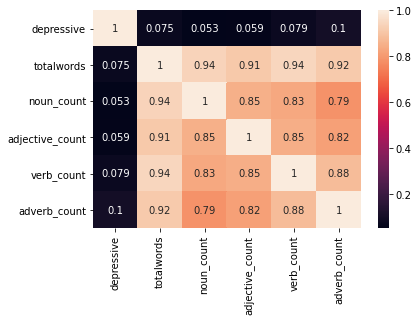

In [18]:
import seaborn as sn
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [22]:
!pip install afinn

     --------------------------------------- 52.6/52.6 kB 93.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53449 sha256=1414f76133f1cea4d6f044f0d8b12b1ac791dc68137bf701fa1bbefb1926c7de
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\bf\e4\0f\0be25f1b201cb8c41fbc43c4f08a8ec48be48e6a86c22e3490
Successfully built afinn


In [23]:
df = pd.read_csv("cleaned_data_lemmatized_linguistic_feature_depressionWordCount.csv")
df.drop(['id', 'title', 'date', 'text', 'lemmatized'], axis = 1, inplace = True)

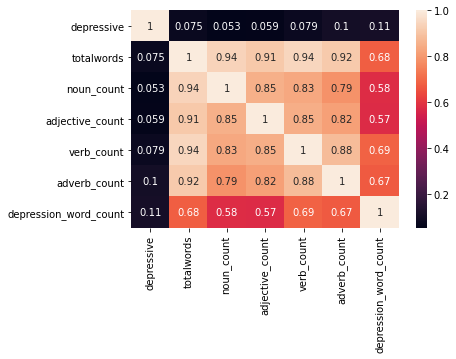

In [24]:
import seaborn as sn
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [30]:
from afinn import Afinn
afn = Afinn()
def create_afin_score(text):
    if afn.score(text) < 0:
        return -1
    else:
        return 1
        

In [31]:
df = pd.read_csv("cleaned_data_lemmatized_linguistic_feature_depressionWordCount.csv")
df ['afine_score'] = df['text'].apply(lambda x: create_afin_score(x))

In [32]:
df.drop(['id', 'title', 'date', 'text', 'lemmatized'], axis = 1, inplace = True)

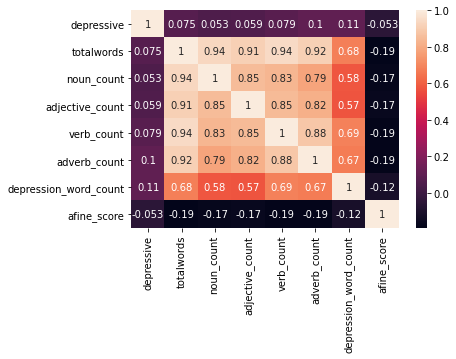

In [33]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [35]:
!pip install visualkeras

     -------------------------------------- 43.3/43.3 kB 211.6 kB/s eta 0:00:00
